In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing

In [2]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df.head()
test.head()

id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898   Lucchese          586    France  Female  23.0       2   
1  165035    15782418       Nott          683    France  Female  46.0       2   
2  165036    15807120         K?          656    France  Female  34.0       7   
3  165037    15808905  O'Donnell          681    France    Male  36.0       8   
4  165038    15607314    Higgins          752   Germany    Male  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2        0.0             1.0        160976.75  
1       0.00              1        1.0             0.0         72549.27  
2       0.00              2        1.0             0.0        138882.09  
3       0.00              1        1.0             0.0        113931.57  
4  121263.62              1        1.0             0.0        139431.00

In [3]:
df.describe()

id    CustomerId    CreditScore            Age         Tenure  \
count  165034.0000  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean    82516.5000  1.569201e+07     656.454373      38.125888       5.020353   
std     47641.3565  7.139782e+04      80.103340       8.867205       2.806159   
min         0.0000  1.556570e+07     350.000000      18.000000       0.000000   
25%     41258.2500  1.563314e+07     597.000000      32.000000       3.000000   
50%     82516.5000  1.569017e+07     659.000000      37.000000       5.000000   
75%    123774.7500  1.575682e+07     710.000000      42.000000       7.000000   
max    165033.0000  1.581569e+07     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  165034.000000  165034.000000  165034.000000   165034.000000   
mean    55478.086689       1.554455       0.753954        0.497770   
std     62817.663278       0.547154       0.430707        0.499997   
min         0.000000       1.000000       0.000000        0.000000   
25%         0.000000       1.000000       1.000000        0.000000   
50%         0.000000       2.000000       1.000000        0.000000   
75%    119939.517500       2.000000       1.000000        1.000000   
max    250898.090000       4.000000       1.000000        1.000000   

       EstimatedSalary         Exited  
count    165034.000000  165034.000000  
mean     112574.822734       0.211599  
std       50292.865585       0.408443  
min          11.580000       0.000000  
25%       74637.570000       0.000000  
50%      117948.000000       0.000000  
75%      155152.467500       0.000000  
max      199992.480000       1.000000

In [4]:
df.shape

(165034, 14)

In [5]:
df['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [7]:
CreditScore = df['CreditScore']

In [8]:
CreditScore

0         668
1         627
2         678
3         581
4         716
         ... 
165029    667
165030    792
165031    565
165032    554
165033    850
Name: CreditScore, Length: 165034, dtype: int64

In [9]:
df.dropna()

id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France    Male   
1            1    15749177   Okwudiliolisa          627    France    Male   
2            2    15694510           Hsueh          678    France    Male   
3            3    15741417             Kao          581    France    Male   
4            4    15766172       Chiemenam          716     Spain    Male   
...        ...         ...             ...          ...       ...     ...   
165029  165029    15667085            Meng          667     Spain  Female   
165030  165030    15665521       Okechukwu          792    France    Male   
165031  165031    15664752            Hsia          565    France    Male   
165032  165032    15689614          Hsiung          554     Spain  Female   
165033  165033    15732798         Ulyanov          850    France    Male   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       33.0       3       0.00              2        1.0             0.0   
1       33.0       1       0.00              2        1.0             1.0   
2       40.0      10       0.00              2        1.0             0.0   
3       34.0       2  148882.54              1        1.0             1.0   
4       33.0       5       0.00              2        1.0             1.0   
...      ...     ...        ...            ...        ...             ...   
165029  33.0       2       0.00              1        1.0             1.0   
165030  35.0       3       0.00              1        0.0             0.0   
165031  31.0       5       0.00              1        1.0             1.0   
165032  30.0       7  161533.00              1        0.0             1.0   
165033  31.0       1       0.00              1        1.0             0.0   

        EstimatedSalary  Exited  
0             181449.97       0  
1              49503.50       0  
2             184866.69       0  
3              84560.88       0  
4              15068.83       0  
...                 ...     ...  
165029        131834.75       0  
165030        131834.45       0  
165031        127429.56       0  
165032         71173.03       0  
165033         61581.79       1  

[165034 rows x 14 columns]

In [10]:
df['Surname'].nunique()

2797

In [11]:
df['SurnameEncoding'], _ = pd.factorize(df['Surname'])
df

id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France    Male   
1            1    15749177   Okwudiliolisa          627    France    Male   
2            2    15694510           Hsueh          678    France    Male   
3            3    15741417             Kao          581    France    Male   
4            4    15766172       Chiemenam          716     Spain    Male   
...        ...         ...             ...          ...       ...     ...   
165029  165029    15667085            Meng          667     Spain  Female   
165030  165030    15665521       Okechukwu          792    France    Male   
165031  165031    15664752            Hsia          565    France    Male   
165032  165032    15689614          Hsiung          554     Spain  Female   
165033  165033    15732798         Ulyanov          850    France    Male   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       33.0       3       0.00              2        1.0             0.0   
1       33.0       1       0.00              2        1.0             1.0   
2       40.0      10       0.00              2        1.0             0.0   
3       34.0       2  148882.54              1        1.0             1.0   
4       33.0       5       0.00              2        1.0             1.0   
...      ...     ...        ...            ...        ...             ...   
165029  33.0       2       0.00              1        1.0             1.0   
165030  35.0       3       0.00              1        0.0             0.0   
165031  31.0       5       0.00              1        1.0             1.0   
165032  30.0       7  161533.00              1        0.0             1.0   
165033  31.0       1       0.00              1        1.0             0.0   

        EstimatedSalary  Exited  SurnameEncoding  
0             181449.97       0                0  
1              49503.50       0                1  
2             184866.69       0                2  
3              84560.88       0                3  
4              15068.83       0                4  
...                 ...     ...              ...  
165029        131834.75       0              319  
165030        131834.45       0              482  
165031        127429.56       0               40  
165032         71173.03       0               64  
165033         61581.79       1             1479  

[165034 rows x 15 columns]

In [12]:
df['GeographyEncoding'], _ = pd.factorize(df['Geography'])
df

id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France    Male   
1            1    15749177   Okwudiliolisa          627    France    Male   
2            2    15694510           Hsueh          678    France    Male   
3            3    15741417             Kao          581    France    Male   
4            4    15766172       Chiemenam          716     Spain    Male   
...        ...         ...             ...          ...       ...     ...   
165029  165029    15667085            Meng          667     Spain  Female   
165030  165030    15665521       Okechukwu          792    France    Male   
165031  165031    15664752            Hsia          565    France    Male   
165032  165032    15689614          Hsiung          554     Spain  Female   
165033  165033    15732798         Ulyanov          850    France    Male   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       33.0       3       0.00              2        1.0             0.0   
1       33.0       1       0.00              2        1.0             1.0   
2       40.0      10       0.00              2        1.0             0.0   
3       34.0       2  148882.54              1        1.0             1.0   
4       33.0       5       0.00              2        1.0             1.0   
...      ...     ...        ...            ...        ...             ...   
165029  33.0       2       0.00              1        1.0             1.0   
165030  35.0       3       0.00              1        0.0             0.0   
165031  31.0       5       0.00              1        1.0             1.0   
165032  30.0       7  161533.00              1        0.0             1.0   
165033  31.0       1       0.00              1        1.0             0.0   

        EstimatedSalary  Exited  SurnameEncoding  GeographyEncoding  
0             181449.97       0                0                  0  
1              49503.50       0                1                  0  
2             184866.69       0                2                  0  
3              84560.88       0                3                  0  
4              15068.83       0                4                  1  
...                 ...     ...              ...                ...  
165029        131834.75       0              319                  1  
165030        131834.45       0              482                  0  
165031        127429.56       0               40                  0  
165032         71173.03       0               64                  1  
165033         61581.79       1             1479                  0  

[165034 rows x 16 columns]

In [13]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
df['GenderEncoding'], _ = pd.factorize(df['Gender'])

In [15]:
df

id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France    Male   
1            1    15749177   Okwudiliolisa          627    France    Male   
2            2    15694510           Hsueh          678    France    Male   
3            3    15741417             Kao          581    France    Male   
4            4    15766172       Chiemenam          716     Spain    Male   
...        ...         ...             ...          ...       ...     ...   
165029  165029    15667085            Meng          667     Spain  Female   
165030  165030    15665521       Okechukwu          792    France    Male   
165031  165031    15664752            Hsia          565    France    Male   
165032  165032    15689614          Hsiung          554     Spain  Female   
165033  165033    15732798         Ulyanov          850    France    Male   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       33.0       3       0.00              2        1.0             0.0   
1       33.0       1       0.00              2        1.0             1.0   
2       40.0      10       0.00              2        1.0             0.0   
3       34.0       2  148882.54              1        1.0             1.0   
4       33.0       5       0.00              2        1.0             1.0   
...      ...     ...        ...            ...        ...             ...   
165029  33.0       2       0.00              1        1.0             1.0   
165030  35.0       3       0.00              1        0.0             0.0   
165031  31.0       5       0.00              1        1.0             1.0   
165032  30.0       7  161533.00              1        0.0             1.0   
165033  31.0       1       0.00              1        1.0             0.0   

        EstimatedSalary  Exited  SurnameEncoding  GeographyEncoding  \
0             181449.97       0                0                  0   
1              49503.50       0                1                  0   
2             184866.69       0                2                  0   
3              84560.88       0                3                  0   
4              15068.83       0                4                  1   
...                 ...     ...              ...                ...   
165029        131834.75       0              319                  1   
165030        131834.45       0              482                  0   
165031        127429.56       0               40                  0   
165032         71173.03       0               64                  1   
165033         61581.79       1             1479                  0   

        GenderEncoding  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
165029               1  
165030               0  
165031               0  
165032               1  
165033               0  

[165034 rows x 17 columns]

In [16]:
columns_to_drop = ['Surname', 'Gender', 'Geography']
new_df = df.drop(columns=columns_to_drop)

In [17]:
new_df

id  CustomerId  CreditScore   Age  Tenure    Balance  \
0            0    15674932          668  33.0       3       0.00   
1            1    15749177          627  33.0       1       0.00   
2            2    15694510          678  40.0      10       0.00   
3            3    15741417          581  34.0       2  148882.54   
4            4    15766172          716  33.0       5       0.00   
...        ...         ...          ...   ...     ...        ...   
165029  165029    15667085          667  33.0       2       0.00   
165030  165030    15665521          792  35.0       3       0.00   
165031  165031    15664752          565  31.0       5       0.00   
165032  165032    15689614          554  30.0       7  161533.00   
165033  165033    15732798          850  31.0       1       0.00   

        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0                   2        1.0             0.0        181449.97       0   
1                   2        1.0             1.0         49503.50       0   
2                   2        1.0             0.0        184866.69       0   
3                   1        1.0             1.0         84560.88       0   
4                   2        1.0             1.0         15068.83       0   
...               ...        ...             ...              ...     ...   
165029              1        1.0             1.0        131834.75       0   
165030              1        0.0             0.0        131834.45       0   
165031              1        1.0             1.0        127429.56       0   
165032              1        0.0             1.0         71173.03       0   
165033              1        1.0             0.0         61581.79       1   

        SurnameEncoding  GeographyEncoding  GenderEncoding  
0                     0                  0               0  
1                     1                  0               0  
2                     2                  0               0  
3                     3                  0               0  
4                     4                  1               0  
...                 ...                ...             ...  
165029              319                  1               1  
165030              482                  0               0  
165031               40                  0               0  
165032               64                  1               1  
165033             1479                  0               0  

[165034 rows x 14 columns]

/Users/ammoa380/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


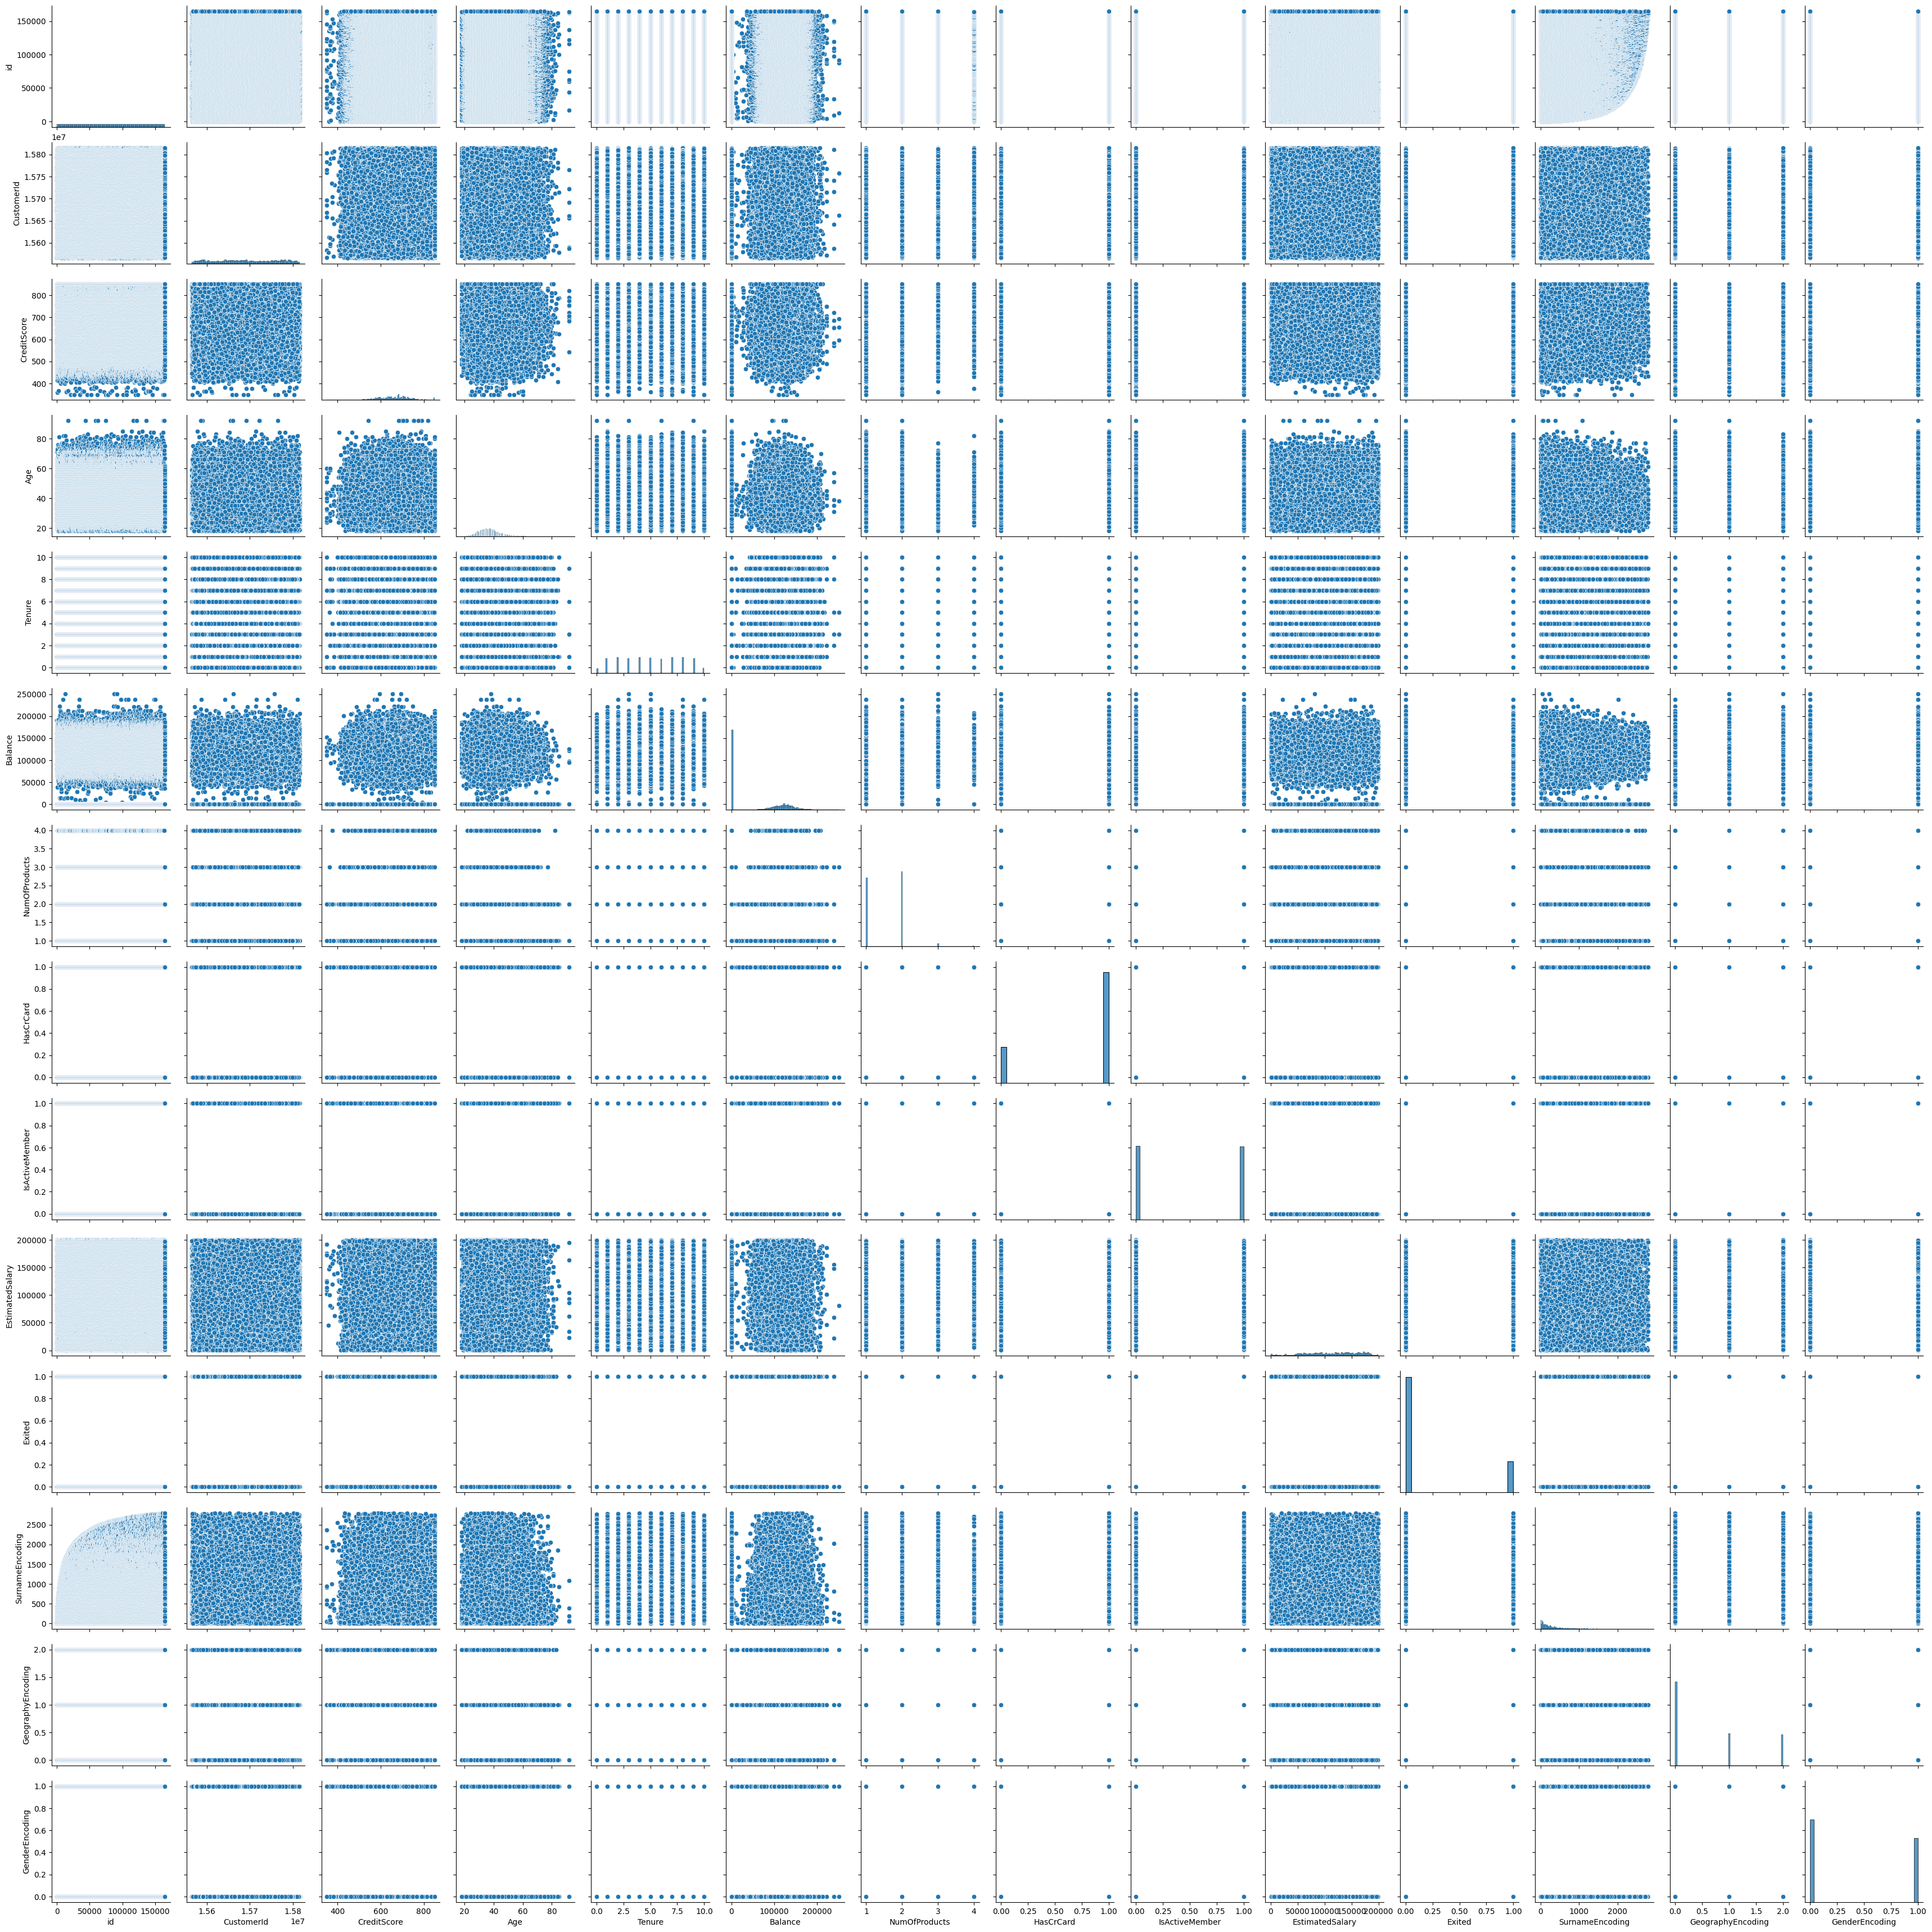

In [18]:
sns.pairplot(data=new_df)

In [19]:
new_df.corr()

id  CustomerId  CreditScore       Age    Tenure  \
id                 1.000000   -0.000387    -0.001201  0.004039 -0.002560   
CustomerId        -0.000387    1.000000     0.007364  0.002696 -0.001252   
CreditScore       -0.001201    0.007364     1.000000 -0.008918  0.000942   
Age                0.004039    0.002696    -0.008918  1.000000 -0.010830   
Tenure            -0.002560   -0.001252     0.000942 -0.010830  1.000000   
Balance            0.000606   -0.008348     0.006973  0.064318 -0.009481   
NumOfProducts     -0.000094    0.004380     0.011361 -0.102195  0.007335   
HasCrCard         -0.004706   -0.005469    -0.002828 -0.012111  0.005327   
IsActiveMember     0.000418   -0.002934     0.014790  0.003320 -0.005532   
EstimatedSalary   -0.001552    0.002891    -0.001820 -0.005399  0.000971   
Exited             0.002512   -0.009947    -0.027383  0.340768 -0.019565   
SurnameEncoding    0.021706    0.000910    -0.005520  0.017742 -0.005273   
GeographyEncoding  0.003211   -0.003916     0.004993  0.087808 -0.005730   
GenderEncoding    -0.001929    0.001944    -0.002310  0.063139 -0.008767   

                    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
id                 0.000606      -0.000094  -0.004706        0.000418   
CustomerId        -0.008348       0.004380  -0.005469       -0.002934   
CreditScore        0.006973       0.011361  -0.002828        0.014790   
Age                0.064318      -0.102195  -0.012111        0.003320   
Tenure            -0.009481       0.007335   0.005327       -0.005532   
Balance            1.000000      -0.361033  -0.018584       -0.015073   
NumOfProducts     -0.361033       1.000000   0.005482        0.039736   
HasCrCard         -0.018584       0.005482   1.000000       -0.021034   
IsActiveMember    -0.015073       0.039736  -0.021034        1.000000   
EstimatedSalary    0.008586      -0.004285   0.004438       -0.008080   
Exited             0.129743      -0.214554  -0.022141       -0.210237   
SurnameEncoding    0.043302      -0.006955  -0.036543        0.000445   
GeographyEncoding  0.476537      -0.090753  -0.012241       -0.029360   
GenderEncoding     0.014699      -0.026098  -0.006418       -0.033722   

                   EstimatedSalary    Exited  SurnameEncoding  \
id                       -0.001552  0.002512         0.021706   
CustomerId                0.002891 -0.009947         0.000910   
CreditScore              -0.001820 -0.027383        -0.005520   
Age                      -0.005399  0.340768         0.017742   
Tenure                    0.000971 -0.019565        -0.005273   
Balance                   0.008586  0.129743         0.043302   
NumOfProducts            -0.004285 -0.214554        -0.006955   
HasCrCard                 0.004438 -0.022141        -0.036543   
IsActiveMember           -0.008080 -0.210237         0.000445   
EstimatedSalary           1.000000  0.018827        -0.033992   
Exited                    0.018827  1.000000         0.012782   
SurnameEncoding          -0.033992  0.012782         1.000000   
GeographyEncoding         0.007994  0.186849         0.016546   
GenderEncoding            0.007778  0.146442         0.012740   

                   GeographyEncoding  GenderEncoding  
id                          0.003211       -0.001929  
CustomerId                 -0.003916        0.001944  
CreditScore                 0.004993       -0.002310  
Age                         0.087808        0.063139  
Tenure                     -0.005730       -0.008767  
Balance                     0.476537        0.014699  
NumOfProducts              -0.090753       -0.026098  
HasCrCard                  -0.012241       -0.006418  
IsActiveMember             -0.029360       -0.033722  
EstimatedSalary             0.007994        0.007778  
Exited                      0.186849        0.146442  
SurnameEncoding             0.016546        0.012740  
GeographyEncoding           1.000000        0.036011  
GenderEncoding              0.036011      

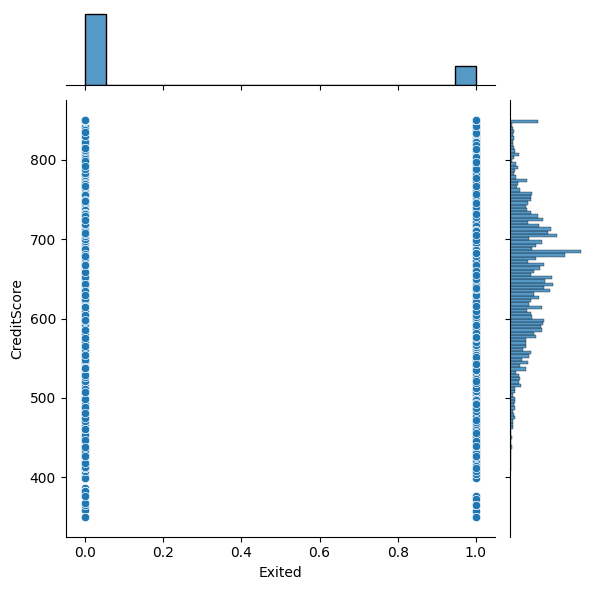

In [20]:
sns.jointplot(data=df, x='Exited', y='CreditScore')

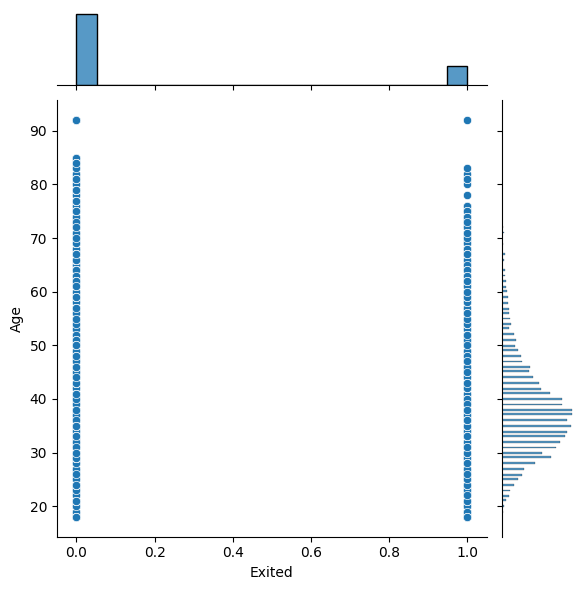

In [21]:
sns.jointplot(data=df, x='Exited', y='Age')

/Users/ammoa380/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


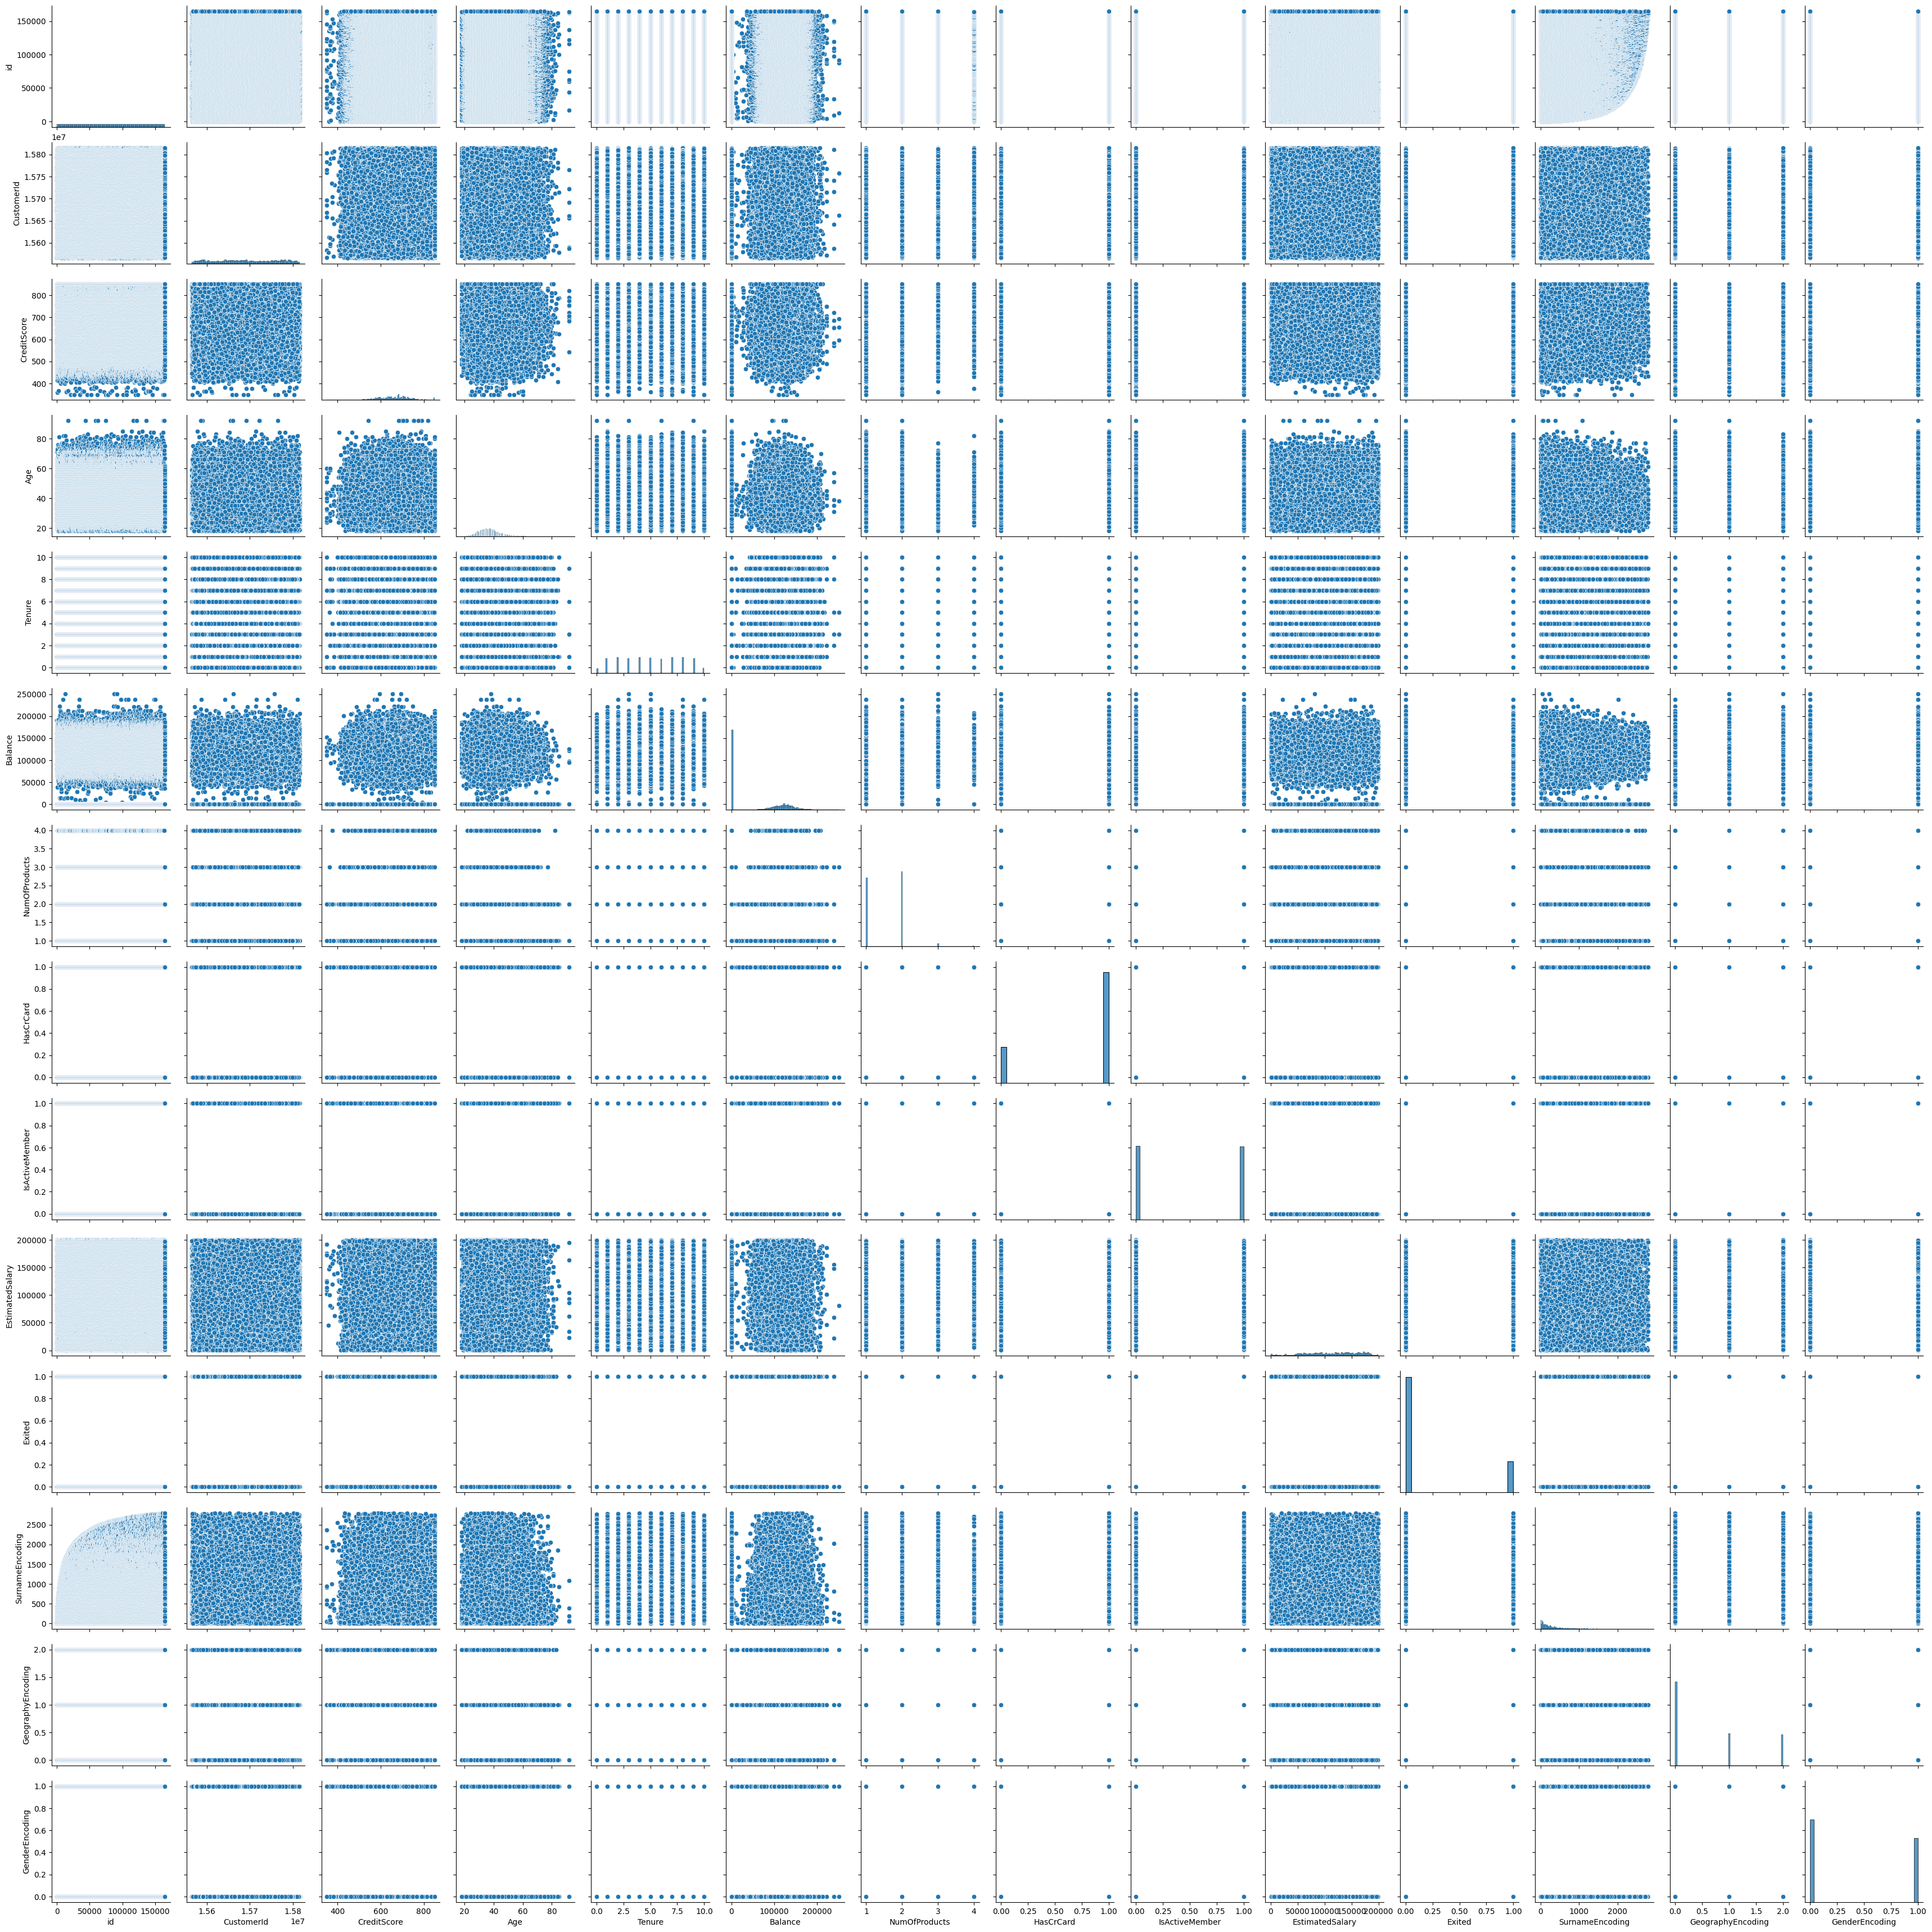

In [22]:
sns.pairplot(data=df)

In [23]:
numeric_df = df.select_dtypes(include='number')
numeric_df

id  CustomerId  CreditScore   Age  Tenure    Balance  \
0            0    15674932          668  33.0       3       0.00   
1            1    15749177          627  33.0       1       0.00   
2            2    15694510          678  40.0      10       0.00   
3            3    15741417          581  34.0       2  148882.54   
4            4    15766172          716  33.0       5       0.00   
...        ...         ...          ...   ...     ...        ...   
165029  165029    15667085          667  33.0       2       0.00   
165030  165030    15665521          792  35.0       3       0.00   
165031  165031    15664752          565  31.0       5       0.00   
165032  165032    15689614          554  30.0       7  161533.00   
165033  165033    15732798          850  31.0       1       0.00   

        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0                   2        1.0             0.0        181449.97       0   
1                   2        1.0             1.0         49503.50       0   
2                   2        1.0             0.0        184866.69       0   
3                   1        1.0             1.0         84560.88       0   
4                   2        1.0             1.0         15068.83       0   
...               ...        ...             ...              ...     ...   
165029              1        1.0             1.0        131834.75       0   
165030              1        0.0             0.0        131834.45       0   
165031              1        1.0             1.0        127429.56       0   
165032              1        0.0             1.0         71173.03       0   
165033              1        1.0             0.0         61581.79       1   

        SurnameEncoding  GeographyEncoding  GenderEncoding  
0                     0                  0               0  
1                     1                  0               0  
2                     2                  0               0  
3                     3                  0               0  
4                     4                  1               0  
...                 ...                ...             ...  
165029              319                  1               1  
165030              482                  0               0  
165031               40                  0               0  
165032               64                  1               1  
165033             1479                  0               0  

[165034 rows x 14 columns]

In [24]:
numeric_df.corr()

id  CustomerId  CreditScore       Age    Tenure  \
id                 1.000000   -0.000387    -0.001201  0.004039 -0.002560   
CustomerId        -0.000387    1.000000     0.007364  0.002696 -0.001252   
CreditScore       -0.001201    0.007364     1.000000 -0.008918  0.000942   
Age                0.004039    0.002696    -0.008918  1.000000 -0.010830   
Tenure            -0.002560   -0.001252     0.000942 -0.010830  1.000000   
Balance            0.000606   -0.008348     0.006973  0.064318 -0.009481   
NumOfProducts     -0.000094    0.004380     0.011361 -0.102195  0.007335   
HasCrCard         -0.004706   -0.005469    -0.002828 -0.012111  0.005327   
IsActiveMember     0.000418   -0.002934     0.014790  0.003320 -0.005532   
EstimatedSalary   -0.001552    0.002891    -0.001820 -0.005399  0.000971   
Exited             0.002512   -0.009947    -0.027383  0.340768 -0.019565   
SurnameEncoding    0.021706    0.000910    -0.005520  0.017742 -0.005273   
GeographyEncoding  0.003211   -0.003916     0.004993  0.087808 -0.005730   
GenderEncoding    -0.001929    0.001944    -0.002310  0.063139 -0.008767   

                    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
id                 0.000606      -0.000094  -0.004706        0.000418   
CustomerId        -0.008348       0.004380  -0.005469       -0.002934   
CreditScore        0.006973       0.011361  -0.002828        0.014790   
Age                0.064318      -0.102195  -0.012111        0.003320   
Tenure            -0.009481       0.007335   0.005327       -0.005532   
Balance            1.000000      -0.361033  -0.018584       -0.015073   
NumOfProducts     -0.361033       1.000000   0.005482        0.039736   
HasCrCard         -0.018584       0.005482   1.000000       -0.021034   
IsActiveMember    -0.015073       0.039736  -0.021034        1.000000   
EstimatedSalary    0.008586      -0.004285   0.004438       -0.008080   
Exited             0.129743      -0.214554  -0.022141       -0.210237   
SurnameEncoding    0.043302      -0.006955  -0.036543        0.000445   
GeographyEncoding  0.476537      -0.090753  -0.012241       -0.029360   
GenderEncoding     0.014699      -0.026098  -0.006418       -0.033722   

                   EstimatedSalary    Exited  SurnameEncoding  \
id                       -0.001552  0.002512         0.021706   
CustomerId                0.002891 -0.009947         0.000910   
CreditScore              -0.001820 -0.027383        -0.005520   
Age                      -0.005399  0.340768         0.017742   
Tenure                    0.000971 -0.019565        -0.005273   
Balance                   0.008586  0.129743         0.043302   
NumOfProducts            -0.004285 -0.214554        -0.006955   
HasCrCard                 0.004438 -0.022141        -0.036543   
IsActiveMember           -0.008080 -0.210237         0.000445   
EstimatedSalary           1.000000  0.018827        -0.033992   
Exited                    0.018827  1.000000         0.012782   
SurnameEncoding          -0.033992  0.012782         1.000000   
GeographyEncoding         0.007994  0.186849         0.016546   
GenderEncoding            0.007778  0.146442         0.012740   

                   GeographyEncoding  GenderEncoding  
id                          0.003211       -0.001929  
CustomerId                 -0.003916        0.001944  
CreditScore                 0.004993       -0.002310  
Age                         0.087808        0.063139  
Tenure                     -0.005730       -0.008767  
Balance                     0.476537        0.014699  
NumOfProducts              -0.090753       -0.026098  
HasCrCard                  -0.012241       -0.006418  
IsActiveMember             -0.029360       -0.033722  
EstimatedSalary             0.007994        0.007778  
Exited                      0.186849        0.146442  
SurnameEncoding             0.016546        0.012740  
GeographyEncoding           1.000000        0.036011  
GenderEncoding              0.036011      

<Axes: xlabel='Exited', ylabel='Count'>

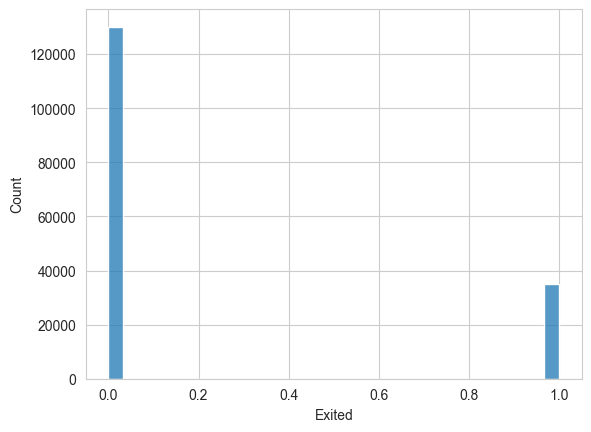

In [25]:
sns.set_style('whitegrid')
sns.histplot(df['Exited'], bins=30)

In [51]:
le = preprocessing.LabelEncoder()
cols = ['Gender', 'Geography', 'Surname']

for col in cols:
    df[col] = le.fit_transform(df[col])
    test[col] = le.fit_transform(test[col])
    print(le.classes_)

df.head()

[0 1]
[0 1 2]
[   0    1    2 ... 2705 2706 2707]


id  CustomerId  Surname  CreditScore  Geography  Gender   Age  Tenure  \
0   0    15674932     1924          668          0       1  33.0       3   
1   1    15749177     1925          627          0       1  33.0       1   
2   2    15694510     1178          678          0       1  40.0      10   
3   3    15741417     1299          581          0       1  34.0       2   
4   4    15766172      467          716          2       1  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [53]:
df.head()

id  CustomerId  Surname  CreditScore  Geography  Gender   Age  Tenure  \
0   0    15674932     1924          668          0       1  33.0       3   
1   1    15749177     1925          627          0       1  33.0       1   
2   2    15694510     1178          678          0       1  40.0      10   
3   3    15741417     1299          581          0       1  34.0       2   
4   4    15766172      467          716          2       1  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [ ]:
test.head()

id  CustomerId  Surname  CreditScore  Geography  Gender   Age  Tenure  \
0  165034    15773898     1482          586          0       0  23.0       2   
1  165035    15782418     1812          683          0       0  46.0       2   
2  165036    15807120     1246          656          0       0  34.0       7   
3  165037    15808905     1832          681          0       1  36.0       8   
4  165038    15607314     1079          752          1       1  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2        0.0             1.0        160976.75  
1       0.00              1        1.0             0.0         72549.27  
2       0.00              2        1.0             0.0        138882.09  
3       0.00              1        1.0             0.0        113931.57  
4  121263.62              1        1.0             0.0        139431.00

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  int64  
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  int64  
 5   Gender           110023 non-null  int64  
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 10.9 MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 165034 non-null  int64  
 1   CustomerId         165034 non-null  int64  
 2   Surname            165034 non-null  int64  
 3   CreditScore        165034 non-null  int64  
 4   Geography          165034 non-null  int64  
 5   Gender             165034 non-null  int64  
 6   Age                165034 non-null  float64
 7   Tenure             165034 non-null  int64  
 8   Balance            165034 non-null  float64
 9   NumOfProducts      165034 non-null  int64  
 10  HasCrCard          165034 non-null  float64
 11  IsActiveMember     165034 non-null  float64
 12  EstimatedSalary    165034 non-null  float64
 13  Exited             165034 non-null  int64  
 14  SurnameEncoding    165034 non-null  int64  
 15  GeographyEncoding  165034 non-null  int64  
 16  Ge

In [ ]:
X = df.drop(columns='Exited')
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [ ]:
model = XGBClassifier(max_depth=1)
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8623322325567304
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     26053
           1       0.75      0.52      0.61      6954

    accuracy                           0.86     33007
   macro avg       0.82      0.74      0.77     33007
weighted avg       0.85      0.86      0.85     33007



In [55]:
df.head()

id  CustomerId  Surname  CreditScore  Geography  Gender   Age  Tenure  \
0   0    15674932     1924          668          0       1  33.0       3   
1   1    15749177     1925          627          0       1  33.0       1   
2   2    15694510     1178          678          0       1  40.0      10   
3   3    15741417     1299          581          0       1  34.0       2   
4   4    15766172      467          716          2       1  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [56]:
test.head()

id  CustomerId  Surname  CreditScore  Geography  Gender   Age  Tenure  \
0  165034    15773898     1482          586          0       0  23.0       2   
1  165035    15782418     1812          683          0       0  46.0       2   
2  165036    15807120     1246          656          0       0  34.0       7   
3  165037    15808905     1832          681          0       1  36.0       8   
4  165038    15607314     1079          752          1       1  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2        0.0             1.0        160976.75  
1       0.00              1        1.0             0.0         72549.27  
2       0.00              2        1.0             0.0        138882.09  
3       0.00              1        1.0             0.0        113931.57  
4  121263.62              1        1.0             0.0        139431.00